In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
questionQualityTrain = pd.read_csv('./preprocessing/questionDataTrain.csv')
del questionQualityTrain['Unnamed: 0']
questionQualityTrain.head()

,qNum,TextLength,WordCount,AvgWordLength,AnswerRate,Entropy,T1,T2,T3,T4,T5
0,4,138,23,6.000000,0.401408,1.381994,1.0,1.0,1.0,0.0,0.0
1,16,77,11,7.000000,0.583478,1.119654,1.0,1.0,0.0,0.0,0.0
2,27,0,0,0.000000,0.451696,1.328048,1.0,1.0,0.0,1.0,0.0
3,56,95,16,5.937500,0.516450,1.194283,0.0,1.0,0.0,0.0,0.0
4,116,100,17,5.882353,0.532516,1.138286,0.0,0.0,0.0,0.0,0.0


In [3]:
questionQualityTest = pd.read_csv('./preprocessing/questionDataTest.csv')
del questionQualityTest['Unnamed: 0']
questionQualityTest.describe()

,qNum,TextLength,WordCount,AvgWordLength,AnswerRate,Entropy,T1,T2,T3,T4,T5
count,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000
mean,376.468085,116.148936,18.234043,6.340289,0.492111,1.169150,0.510638,0.510638,0.489362,0.489362,0.510638
std,243.370879,67.993279,11.806801,1.799205,0.171195,0.241291,0.505291,0.505291,0.505291,0.505291,0.505291
min,13.000000,0.000000,0.000000,0.000000,0.164776,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,178.000000,66.500000,8.500000,5.803668,0.331373,1.014437,0.000000,0.000000,0.000000,0.000000,0.000000
50%,357.000000,96.000000,16.000000,6.250000,0.486194,1.233473,1.000000,1.000000,0.000000,0.000000,1.000000
75%,523.500000,183.500000,29.500000,7.219048,0.629262,1.354630,1.000000,1.000000,1.000000,1.000000,1.000000
max,907.000000,257.000000,44.000000,10.428571,0.844262,1.472193,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
XTrain = questionQualityTrain.loc[:,['TextLength','WordCount','AvgWordLength','AnswerRate','Entropy']]
YTrainT1 = questionQualityTrain.loc[:,['T1']]
YTrainT2 = questionQualityTrain.loc[:,['T2']]
YTrainT3 = questionQualityTrain.loc[:,['T3']]
YTrainT4 = questionQualityTrain.loc[:,['T4']]
YTrainT5 = questionQualityTrain.loc[:,['T5']]
YTrain = pd.DataFrame(questionQualityTrain.loc[:,['T1','T2','T3','T4','T5']].mean(axis=1),index=questionQualityTrain.index,columns=['meanScore'])
#Train = questionQualityTrain.loc[:,['AnswerRate','SelectionStd','Entropy','TokenLength','T1','T2','T3','T4','T5']]
XTest = questionQualityTest.loc[:,['TextLength','WordCount','AvgWordLength','AnswerRate','Entropy']]
TrainQnum = questionQualityTrain.loc[:,['qNum']]
TestQnum = questionQualityTest.loc[:,['qNum']]

In [5]:
XTrain.corr()

,TextLength,WordCount,AvgWordLength,AnswerRate,Entropy
TextLength,1.000000,0.985697,0.154480,-0.081202,0.157567
WordCount,0.985697,1.000000,0.049917,-0.090987,0.176684
AvgWordLength,0.154480,0.049917,1.000000,0.263262,-0.346170
AnswerRate,-0.081202,-0.090987,0.263262,1.000000,-0.845209
Entropy,0.157567,0.176684,-0.346170,-0.845209,1.000000


## Train Data

In [6]:
qualityResponsePublic = pd.read_csv('./data/test_data/quality_response_remapped_public.csv')
del qualityResponsePublic['Unnamed: 0.1']
del qualityResponsePublic['Unnamed: 0']
qualityResponsePublic = qualityResponsePublic.astype('Int64')
qualityResponsePublic = qualityResponsePublic.dropna()

## Test Data

In [7]:
qualityResponsePrivate = pd.read_csv('./data/test_data/quality_response_remapped_private.csv')
del qualityResponsePrivate['Unnamed: 0.1']
del qualityResponsePrivate['Unnamed: 0']
qualityResponsePrivate = qualityResponsePrivate.astype('Int64')
qualityResponsePrivate = qualityResponsePrivate.dropna()

## Logistic Regression

In [8]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [9]:
print(XTrain.columns)

Index(['TextLength', 'WordCount', 'AvgWordLength', 'AnswerRate', 'Entropy'], dtype='object')


In [10]:
formulaOCR = """meanScore ~ WordCount + AvgWordLength"""
modelOCR = smf.glm(formula = formulaOCR,
                data=XTrain.join(YTrain), family=sm.families.Binomial())
modelOCR_fit = modelOCR.fit() 
modelOCR_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              meanScore   No. Observations:                   49
Model:                            GLM   Df Residuals:                       46
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -26.570
Date:                Tue, 09 May 2023   Deviance:                       28.116
Time:                        12:00:21   Pearson chi2:                     22.4
No. Iterations:                     3   Pseudo R-squ. (CS):            0.05238
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.2740      1.000      0.274      0.784      -1.686       2.234
WordCount         0.0292      0.022      1.340      0.180      -0.013       0.072
AvgWordLength    -0.1348      0.147     -0.916      0.360      -0.423       0.154
=================================================================================
"""

In [11]:
YhatOCR = modelOCR_fit.predict(XTrain)
trainScoreDfOCR = TrainQnum.join(pd.DataFrame(YhatOCR, columns=['score']))
trainScoreDfOCR = trainScoreDfOCR.set_index('qNum')
pred = []
for i, row in qualityResponsePublic.iterrows():
    left, right = row['left'], row['right']
    valueL, valueR = trainScoreDfOCR.loc[left,'score'], trainScoreDfOCR.loc[right,'score']
    pred.append(1 if valueL > valueR else 2)
accResult = (np.mean(pred == qualityResponsePublic['T1_ALR']),
                np.mean(pred == qualityResponsePublic['T2_CL']),
                np.mean(pred == qualityResponsePublic['T3_GF']),
                np.mean(pred == qualityResponsePublic['T4_MQ']),
                np.mean(pred == qualityResponsePublic['T5_NS']))
print(accResult)
maxTrainScoreOCR = max(accResult)

(0.64, 0.68, 0.68, 0.64, 0.64)


In [12]:
formulaE = """meanScore ~ Entropy"""
modelE = smf.glm(formula = formulaE,
                data=XTrain.join(YTrain), family=sm.families.Binomial())
modelE_fit = modelE.fit() 
modelE_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              meanScore   No. Observations:                   49
Model:                            GLM   Df Residuals:                       47
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -24.721
Date:                Tue, 09 May 2023   Deviance:                       24.417
Time:                        12:00:25   Pearson chi2:                     19.9
No. Iterations:                     4   Pseudo R-squ. (CS):             0.1213
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.5937      2.118     -2.169      0.030      -8.745      -0.442
Entropy        3.9157      1.755      2.231      0.026       0.476       7.356
==============================================================================
"""

In [13]:
YhatE = modelE_fit.predict(XTrain)
trainScoreDfE = TrainQnum.join(pd.DataFrame(YhatE, columns=['score']))
trainScoreDfE = trainScoreDfE.set_index('qNum')
pred = []
for i, row in qualityResponsePublic.iterrows():
    left, right = row['left'], row['right']
    valueL, valueR = trainScoreDfE.loc[left,'score'], trainScoreDfE.loc[right,'score']
    pred.append(1 if valueL > valueR else 2)
accResult = (np.mean(pred == qualityResponsePublic['T1_ALR']),
                np.mean(pred == qualityResponsePublic['T2_CL']),
                np.mean(pred == qualityResponsePublic['T3_GF']),
                np.mean(pred == qualityResponsePublic['T4_MQ']),
                np.mean(pred == qualityResponsePublic['T5_NS']))
print(accResult)
maxTrainScoreE = max(accResult)

(0.72, 0.76, 0.76, 0.64, 0.64)


## Ensemble

### public dataset

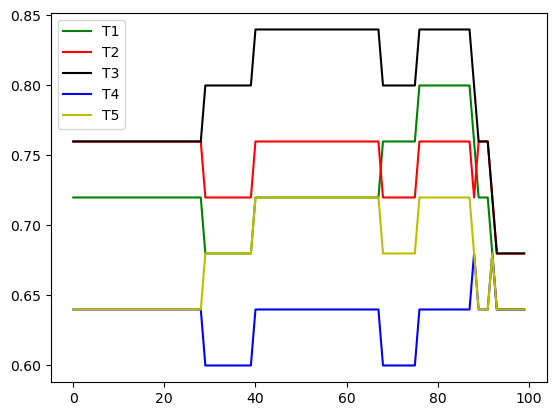

In [14]:
YhatOCR = modelOCR_fit.predict(XTrain)
trainScoreDfOCR = TrainQnum.join(pd.DataFrame(YhatOCR, columns=['score']))
trainScoreDfOCR = trainScoreDfOCR.set_index('qNum')
YhatE = modelE_fit.predict(XTrain)
trainScoreDfE = TrainQnum.join(pd.DataFrame(YhatE, columns=['score']))
trainScoreDfE = trainScoreDfE.set_index('qNum')
results = []
for i in range(100):
    pred = []
    ensembleRate = i/100
    for i, row in qualityResponsePublic.iterrows():
        left, right = row['left'], row['right']
        valueLOCR, valueROCR = trainScoreDfOCR.loc[left,'score'], trainScoreDfOCR.loc[right,'score']
        valueLE, valueRE = trainScoreDfE.loc[left,'score'], trainScoreDfE.loc[right,'score']
        valueL, valueR = ensembleRate*valueLOCR + (1-ensembleRate)*valueLE, ensembleRate*valueROCR + (1-ensembleRate)*valueRE
        pred.append(1 if valueL > valueR else 2)
    accResult = (np.mean(pred == qualityResponsePublic['T1_ALR']),
        np.mean(pred == qualityResponsePublic['T2_CL']),
        np.mean(pred == qualityResponsePublic['T3_GF']),
        np.mean(pred == qualityResponsePublic['T4_MQ']),
        np.mean(pred == qualityResponsePublic['T5_NS']))
    results.append(accResult)
arrResult = np.array(results)
plt.plot(range(100), arrResult[:,0], 'g', label='T1')
plt.plot(range(100), arrResult[:,1], 'r', label='T2')
plt.plot(range(100), arrResult[:,2], 'black', label='T3')
plt.plot(range(100), arrResult[:,3], 'b', label='T4')
plt.plot(range(100), arrResult[:,4], 'y', label='T5')
plt.legend()

### Model evaluation in test(private) dataset

I have to choose ensembleRate which is in range of 40 to 70 (best in public score)

So, I choose ensembleRate as portion of maxTrainSocreOCR in sum of maxTrainScoreE(entropy) and maxTrainScoreOCR(ocr) which is abount 47.

In [19]:
YhatOCR = modelOCR_fit.predict(XTest)
testScoreDfOCR = TestQnum.join(pd.DataFrame(YhatOCR, columns=['score']))
testScoreDfOCR = testScoreDfOCR.set_index('qNum')
YhatE = modelE_fit.predict(XTest)
testScoreDfE = TestQnum.join(pd.DataFrame(YhatE, columns=['score']))
testScoreDfE = testScoreDfE.set_index('qNum')
ensembleRate = maxTrainScoreOCR/(maxTrainScoreE + maxTrainScoreOCR)
pred = []
for i, row in qualityResponsePrivate.iterrows():
    left, right = row['left'], row['right']
    valueLOCR, valueROCR = testScoreDfOCR.loc[left,'score'], testScoreDfOCR.loc[right,'score']
    valueLE, valueRE = testScoreDfE.loc[left,'score'], testScoreDfE.loc[right,'score']
    valueL, valueR = ensembleRate*valueLOCR + (1-ensembleRate)*valueLE, ensembleRate*valueROCR + (1-ensembleRate)*valueRE
    pred.append(1 if valueL > valueR else 2)
accResult = (np.mean(pred == qualityResponsePrivate['T1_ALR']),
                np.mean(pred == qualityResponsePrivate['T2_CL']),
                np.mean(pred == qualityResponsePrivate['T3_GF']),
                np.mean(pred == qualityResponsePrivate['T4_MQ']),
                np.mean(pred == qualityResponsePrivate['T5_NS']))
print(accResult)

(0.625, 0.625, 0.6666666666666666, 0.7916666666666666, 0.7083333333333334)


## Prediction

In [20]:
forPredictDf = pd.read_csv('./preprocessing/qaResultDF.csv')
del forPredictDf['Unnamed: 0']
forPredictDf = forPredictDf[['TextLength','WordCount','AvgWordLength','AnswerRate','Entropy']]
forPredictDf.head()

,TextLength,WordCount,AvgWordLength,AnswerRate,Entropy
0,143,24,5.958333,0.443457,1.203001
1,50,5,10.000000,0.571429,0.802464
2,101,8,12.625000,0.385214,1.391026
3,32,6,5.333333,0.808757,0.755624
4,138,23,6.000000,0.401408,1.381994


In [22]:

YhatOCR = modelOCR_fit.predict(forPredictDf)
YhatE = modelE_fit.predict(forPredictDf)
Yhat = YhatOCR*ensembleRate + YhatE*(1-ensembleRate)
qualityScore = pd.DataFrame(Yhat,columns=['Score'])
qualityScore.sort_values(['Score'],ascending=False, inplace=True)
qualityScore.reset_index(inplace=True)
qualityScore.rename(columns={'index':'QuestionId'}, inplace=True)
qualityScore.sort_values(['QuestionId'], inplace=True)
qualityScore.reset_index(inplace=True)
qualityScore.rename(columns={'index':'ranking'}, inplace=True)
qualityScore['ranking'] = qualityScore['ranking'] + 1
qualityScore.set_index('QuestionId',inplace=True)

In [23]:
qualityScore.loc[:,['ranking']].to_csv('submission.csv')